In [5]:
import torch
print(torch.cuda.is_available())  # Returns True if CUDA is available, otherwise False


False


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as fn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, SubsetRandomSampler
import os
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


SPECIFY THE DIRECTORIES AND TRANSFORMATIONS

In [7]:
TRAINING_DIR = "Dataset\MNIST Dataset JPG format\MNIST Dataset JPG format\MNIST - JPG - testing"
TEST_DIR = "Dataset\MNIST Dataset JPG format\MNIST Dataset JPG format\MNIST - JPG - training"

In [8]:


trans = transforms.Compose([
  transforms.Grayscale(),
  transforms.Resize(28),
  transforms.ToTensor(),
  transforms.Normalize(mean=(0.5,), std=(0.5,))
])

In [9]:
# Membuat dataset menggunakan ImageFolder
trainfolder = datasets.ImageFolder(root=TRAINING_DIR, transform=trans)
testfolder = datasets.ImageFolder(root=TEST_DIR, transform=trans)

#trainloader = data.DataLoader(trainfolder, batch_size=128, shuffle=True, num_workers=12)
#testloader = data.DataLoader(testfolder, batch_size=128, shuffle=True, num_workers=12)

# Mengambil indeks acak untuk 800 sampel dari data training
num_training_samples = 800
train_indices = list(range(len(trainfolder)))
random.shuffle(train_indices)
random_train_indices = train_indices[:num_training_samples]

# Membuat SubsetRandomSampler dengan indeks acak untuk data training
train_sampler = SubsetRandomSampler(random_train_indices)

# Membuat DataLoader dengan sampler untuk data training
trainloader = DataLoader(trainfolder, batch_size=128, sampler=train_sampler, num_workers=12)

# Mengambil indeks acak untuk 200 sampel dari data testing
num_test_samples = 200
test_indices = list(range(len(testfolder)))
random.shuffle(test_indices)
random_test_indices = test_indices[:num_test_samples]

# Membuat SubsetRandomSampler dengan indeks acak untuk data testing
test_sampler = SubsetRandomSampler(random_test_indices)

# Membuat DataLoader dengan sampler untuk data testing
testloader = DataLoader(testfolder, batch_size=128, sampler=test_sampler, num_workers=12)

In [10]:
class MNISTAE(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = nn.Sequential(
      nn.Conv2d(1, 8, kernel_size=5),
      nn.ReLU(True),
      nn.Conv2d(8, 16, kernel_size=5),
      nn.ReLU(True)
    )
    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(16, 8, kernel_size=5),
      nn.ReLU(True),
      nn.ConvTranspose2d(8, 1, kernel_size=5),
      nn.Tanh()
    )

  def encode(self, x):
    return self.encoder(x)

  def decode(self, x):
    return self.decoder(x)

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [11]:
ae = MNISTAE()
loss_function = nn.MSELoss()
adam = optim.SGD(ae.parameters(), lr=1e-3, momentum=0.9)


  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:54<00:00, 27.09s/it]




[1] Train Loss=1.097485899925232 Test Loss=1.067521095275879




100%|██████████| 2/2 [00:49<00:00, 24.71s/it]




[2] Train Loss=0.8667027950286865 Test Loss=0.8236904740333557




100%|██████████| 2/2 [00:49<00:00, 24.99s/it]




[3] Train Loss=0.5996091961860657 Test Loss=0.5716084837913513




100%|██████████| 2/2 [00:51<00:00, 25.57s/it]




[4] Train Loss=0.4773283302783966 Test Loss=0.515815258026123




100%|██████████| 2/2 [00:48<00:00, 24.43s/it]




[5] Train Loss=0.4903547465801239 Test Loss=0.48412734270095825




100%|██████████| 2/2 [00:53<00:00, 26.72s/it]




[6] Train Loss=0.435488224029541 Test Loss=0.45474451780319214




100%|██████████| 2/2 [00:50<00:00, 25.50s/it]




[7] Train Loss=0.44379478693008423 Test Loss=0.4436780512332916




100%|██████████| 2/2 [00:52<00:00, 26.12s/it]




[8] Train Loss=0.39043569564819336 Test Loss=0.40545982122421265




100%|██████████| 2/2 [00:50<00:00, 25.49s/it]




[9] Train Loss=0.3906913697719574 Test Loss=0.3820321261882782




100%|██████████| 2/2 [00:49<00:00, 24.96s/it]




[10] Train Loss=0.36497217416763306 Test Loss=0.36275583505630493




100%|██████████| 2/2 [00:51<00:00, 25.75s/it]




[11] Train Loss=0.3504292964935303 Test Loss=0.35369235277175903




100%|██████████| 2/2 [00:49<00:00, 24.65s/it]




[12] Train Loss=0.34789198637008667 Test Loss=0.3279707133769989




100%|██████████| 2/2 [00:50<00:00, 25.22s/it]




[13] Train Loss=0.31937646865844727 Test Loss=0.32131606340408325




100%|██████████| 2/2 [00:50<00:00, 25.25s/it]




[14] Train Loss=0.3212234377861023 Test Loss=0.3168913424015045




100%|██████████| 2/2 [00:50<00:00, 25.37s/it]




[15] Train Loss=0.30897432565689087 Test Loss=0.3015182614326477




100%|██████████| 2/2 [00:50<00:00, 25.05s/it]




[16] Train Loss=0.2765301465988159 Test Loss=0.27754369378089905




100%|██████████| 2/2 [00:50<00:00, 25.33s/it]




[17] Train Loss=0.2595007121562958 Test Loss=0.2523607909679413




100%|██████████| 2/2 [00:51<00:00, 25.73s/it]




[18] Train Loss=0.23524919152259827 Test Loss=0.2316787987947464




100%|██████████| 2/2 [00:49<00:00, 24.84s/it]




[19] Train Loss=0.21753285825252533 Test Loss=0.21353024244308472




100%|██████████| 2/2 [00:50<00:00, 25.16s/it]




[20] Train Loss=0.19722162187099457 Test Loss=0.19486525654792786




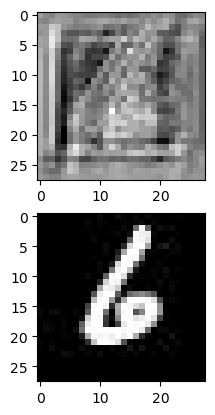

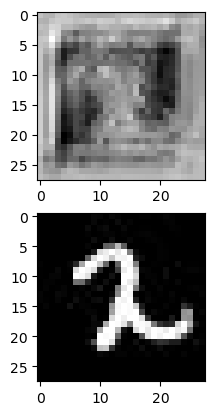

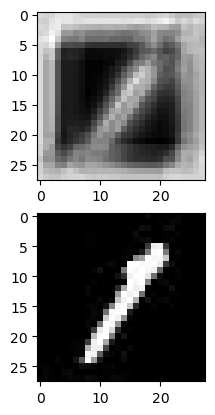

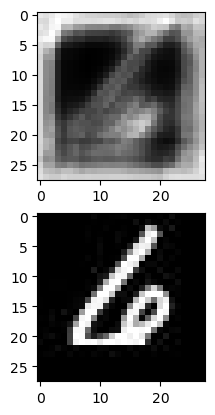

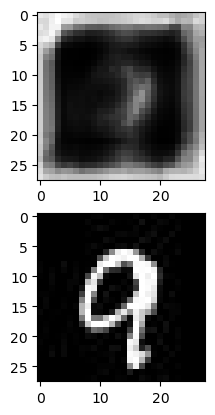

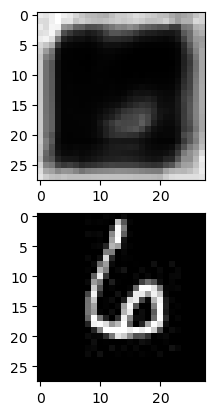

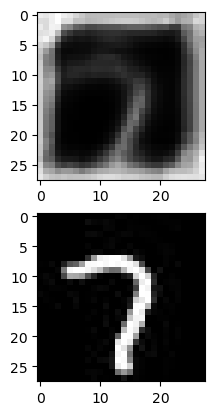

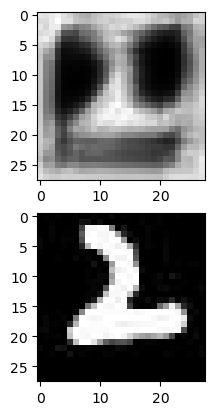

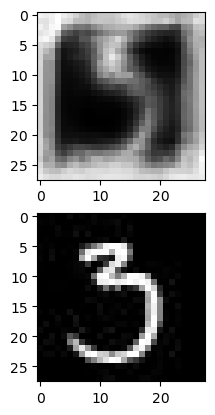

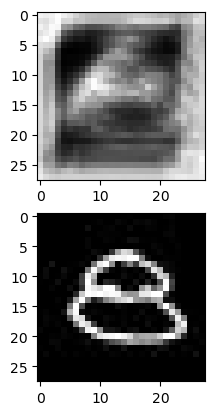

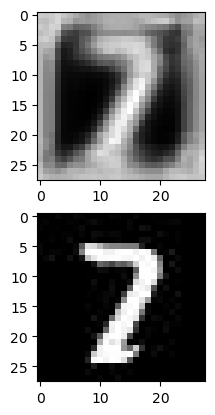

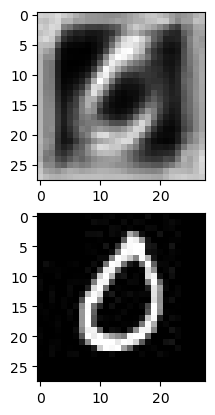

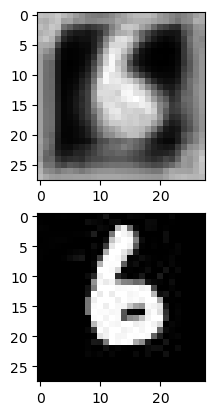

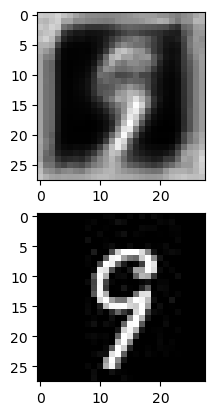

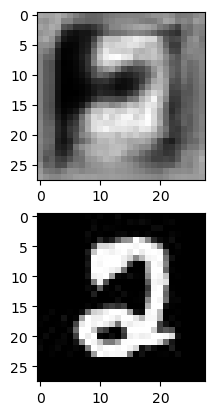

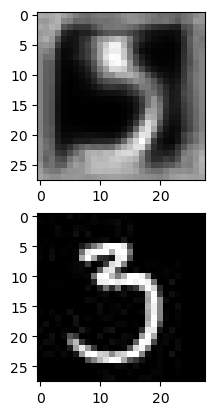

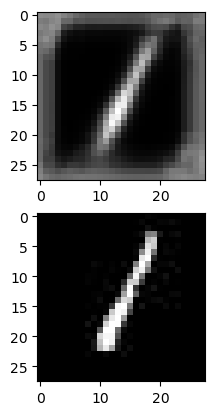

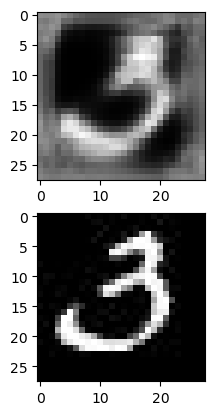

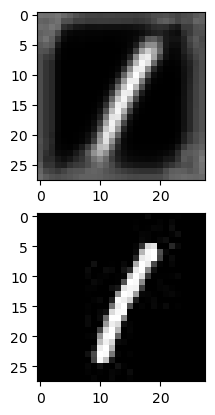

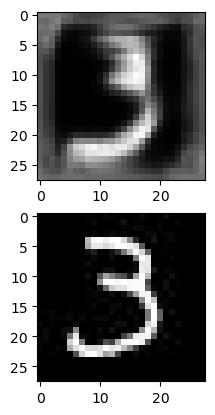

In [12]:
for epoch in range(20):
  for x, _ in tqdm(trainloader):
    x = x.float()
    
    adam.zero_grad()

    x_pred = ae.forward(x)

    train_loss = loss_function(x_pred, x)
    train_loss.backward()
    adam.step()

  for x, _ in tqdm(testloader):
    x = x.float()

    x_pred = ae.forward(x)

    test_loss = loss_function(x_pred, x)
 
  pred_img = np.moveaxis(x_pred.detach().cpu().numpy()[0], 0, -1).reshape(28, 28)
  img = np.moveaxis(x.detach().cpu().numpy()[0], 0, -1).reshape(28, 28) 

  fig = plt.figure()

  ax1 = fig.add_subplot(2, 1, 1)
  ax1.imshow(pred_img, cmap='gray')
  ax2 = fig.add_subplot(2, 1, 2)
  ax2.imshow(img, cmap='gray')
  fig.savefig("mnist_conv_autoencoder_images/generated_image_epoch_{}.png".format(epoch+1))

  print("\n")
  print("[{}] Train Loss={} Test Loss={}".format(epoch+1, train_loss.detach().cpu().numpy(), test_loss.detach().cpu().numpy()))
  print("\n")

In [13]:
torch.save(ae.state_dict(), "mnist_conv_autoencoder_weights.pth")

In [ ]:
ae.eval()  # Set model ke mode evaluasi
latent_vectors = []
with torch.no_grad():  # Nonaktifkan perhitungan gradien
    for data in trainloader:
        img, _ = data
        _, latent = ae(img)
        latent_vectors.append(latent.numpy())

latent_vectors = np.concatenate(latent_vectors, axis=0)